# Master I Informatique
## Intelligence Artificielle
## Introduction au Deep Learning

# Réseaux de neurones pour la reconnaissance de chiffres manuscrits

Dans ce notebook, nous allons voir, étape par étape, comment entrainer un model pour reconnaitre des chiffres manuscrits. Pour cela nous devons :

1. importer les bibliothèques nécessaires, en particulier la bibliothèque keras 
2. charger les données, il s'agit du dataset mnist
3. définir notre réseau de neurones
4. entrainer le modèle
5. Le tester


Commençons donc par importer les bibliothèques nécessaires :

In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


Puis nous allons charger les données du dataset.

In [2]:
from keras.datasets import mnist

 Les concepteurs de mnist ont bien fait les choses : ils ont prévu une méthode permettant de découper les données en train et test.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

On peut commencer par quelques manipulations de base pour explorer les données qu'on vient de charger :

In [4]:
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',y_train.shape)

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)


On voit que X_train contient 60k d'exemples. Cheque exemple est une image 28 x 28. y_train contient 60k  étiquettes. On peut le voir en faisant comme suit :

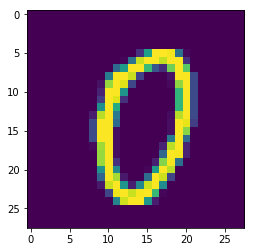

0


In [5]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1000])
plt.show()

print(y_train[1000])

Maintenant que nous avons vu à quoi ressemble notre dataset, on peut commencer à utiliser les réseaux de neurones pour reconnaître les chiffres manuscrits. 

Pour le moment, nous avons vu les réseaux de neurones "simples" et pas d'architectures avancées. Nous allons donc devoir "applatir" les données en entrée de notre réseau. En effet, les données arrivent sous forme d'images 28 x 28. Nous allons donc transformer chaque image en un vecteur de taille 28 x 28 = 784 :

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
print(X_train.shape)

(60000, 784)


Patience encore, nous allons faire quelques transformations supplémetaires sur les données pour changer le type de donnéese et les normer :

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

#### Réseaux de neurones avec keras

Nos données sont à présent prètes pour être utilisées pour l'entrainement d'un réseau de neurones :

On commence donc par importer les différents éléments de la bibliothèque keras nécessaires à ce qu'on souhaite faire.

In [9]:
from keras.models import Sequential #Il s'agit du modèle des réseaux orientés. 
#Les données sont passées, après transformation, d'une couche à la suivante.

from keras.layers import Dense #Pour pouvoir ajouter une couche complètement connéectée

from keras.optimizers import sgd #Pour charger un algorithme d'ptimisation. Pour le moment, 
#nous allons utiliser le sgd : stochastic gradient descent.

On transforme les deux classes en vecteurs en utilisant la technique "one-hot encoding" 

In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

On peut à présent écrire la fonction définissant notre réseau :

In [11]:
num_classes = y_train.shape[1]

def neural_network():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

 ... instantier le modèle, afficher sa description :

In [12]:
model = neural_network()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


... l'entraîner et le tester :

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=100)#98.36%

scores = model.evaluate(X_test, y_test)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 97us/step
Neural network accuracy: 97.38%


In [36]:
y_prob = model.predict(X_test)
y_pred = [np.argmax(y_prob[i]) for i in range(len(y_prob))]
y_test_o = [np.argmax(y_test[i]) for i in range(len(y_prob))]
#print(y_pred)
#print(y_test_o)

from sklearn import metrics
mc = metrics.confusion_matrix(y_test_o, y_pred)
print(mc)
acc = np.sum(np.diag(mc))/np.sum(mc)
print('{:2.2%}'.format(acc))

[[ 972    0    0    0    1    1    2    1    2    1]
 [   0 1125    3    1    0    1    3    0    2    0]
 [   5    3 1001    5    3    0    2    6    7    0]
 [   1    0    3  993    0    0    0    7    2    4]
 [   1    0    3    0  963    0    4    1    1    9]
 [   3    1    0   17    2  853    8    1    4    3]
 [   5    2    0    1    7    2  939    0    2    0]
 [   0    7    9    4    0    0    0  996    0   12]
 [   3    1    4    9    6    4    4    3  935    5]
 [   4    3    1    8   24    1    0    7    0  961]]
97.38%


En introduisant le dropout :

In [37]:
def neural_network_with_do():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = neural_network()
model.summary()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=100)#98.36%

scores = model.evaluate(X_test, y_test)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 107us/step
Neural network accuracy: 96.69%
